In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Q1
## Density Estimation: Psychological Experiments

We will use this data to study whether or not the two brain regions are likely to be indepen-
dent of each other and considering different types of political view For this question; you
can use the proper package for histogram and KDE; no need to write your own.
The data set n90pol.csv contains information on 90 university students who participated in
a psychological experiment designed to look for relationships between the size of different
regions of the brain and political views. The variables amygdala and acc indicate the volume
of two particular brain regions known to be involved in emotions and decision-making, the
amygdala and the anterior cingulate cortex; more exactly, these are residuals from the pre-
dicted volume, after adjusting for height, sex, and similar body-type variables. The variable
orientation gives the students’ locations on a five-point scale from 1 (very conservative) to 5
(very liberal). Note that in the dataset, we only have observations for orientation from 2 to
5.

#### 1. Form the 1-dimensional histogram and KDE to estimate the distrbutions of amygdala and acc, respectively. For this question, you can ignore the variable **orientation**.

In [2]:
#load data
data = pd.read_csv('n90pol.csv')
data.head()

,amygdala,acc,orientation
0,0.0051,-0.0286,2
1,-0.0674,0.0007,3
2,-0.0257,-0.0110,3
3,0.0504,-0.0167,2
4,0.0125,-0.0005,5


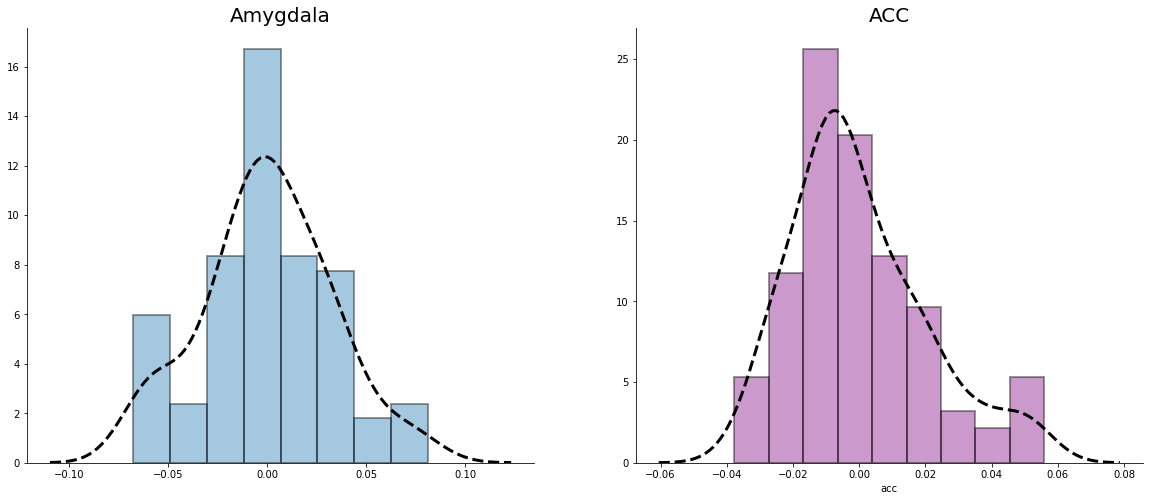

In [3]:
plt.subplots(nrows=1, ncols=2, figsize=(20,8))
plt.subplot(121)
sns.distplot(data.amygdala.values, kde_kws=dict(ls='--', lw=3, color='k'),hist_kws=dict(edgecolor="k", linewidth=2))
plt.title('Amygdala', fontsize=20)
plt.subplot(122)
sns.distplot(data.acc, color='purple', kde_kws=dict(ls='--', lw=3, color='k'), hist_kws=dict(edgecolor="k", linewidth=2))
plt.title('ACC',fontsize=20)
sns.despine(right=True, top=True)
plt.savefig('kde.png', bbox_layout='tight', bbox_inches='tight')
plt.show()

#### 2. Form 2-dimensional histogram for the pairs of variables (amygdala, acc) Decide on a suitable number of bins so you can see the shape of the distribution clearly Also use kernel-density-estimation (KDE) to estimate the 2-dimensional density function of (amygdala, acc). Use a simple multi-dimensional Gaussian kernel, for $$ x = \begin{bmatrix}x_1\\x_2\end{bmatrix} \in \mathbb{R}^2$$, where $x_1$ and $x_2$ are the two dimensions respectively. $$K(x) = \frac{1}{2\pi} e^{-\frac{(x_1)^2 + (x_2)^2}{2}}$$. Recall in this case, the kernel density estimator (KDE) for a density is given by. 

$$p(x) = \frac{1}{m}\sum_{i=1}^m\frac{1}{h}K(\frac{x^i - x}{h})$$

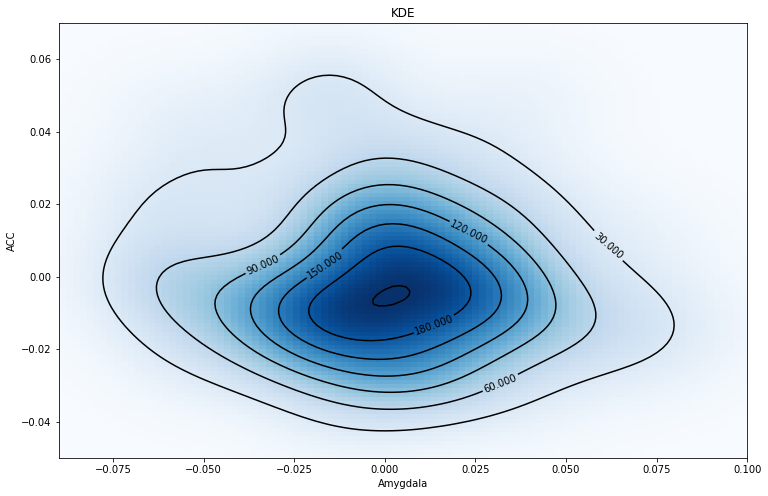

In [4]:
'''
Code to generate this contour plot comes from SO post found here:
https://stackoverflow.com/questions/30145957/plotting-2d-kernel-density-estimation-with-python
'''

x = data.loc[:, 'amygdala'].values
y = data.loc[:, 'acc'].values
xmin, xmax = -0.09, 0.1
ymin, ymax = -0.05, 0.07


xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = sm.nonparametric.KDEMultivariate(data=values,var_type='cc', bw='normal_reference')
f = np.reshape(kernel.pdf(positions).T, xx.shape)

fig = plt.figure(figsize=(15,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)


ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

cset = ax.contour(xx, yy, f, colors='k')

ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('Amygdala')
ax.set_ylabel('ACC')
ax.set_title('KDE')
plt.savefig('2d_kde.png', bbox_layout='tight', bbox_inches='tight')
plt.show()

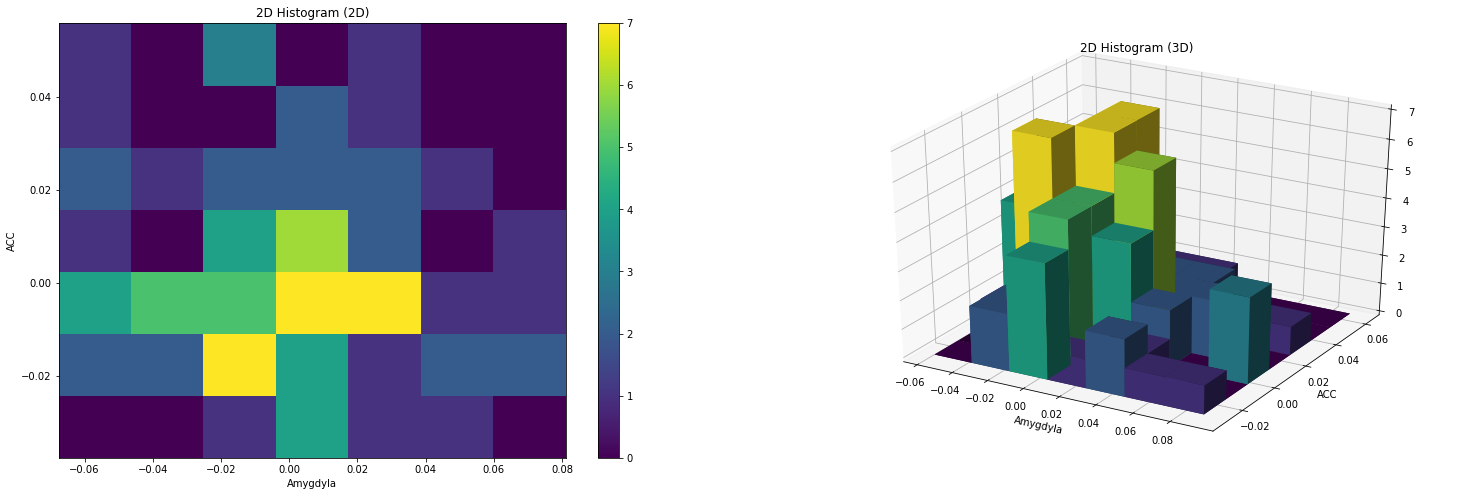

In [5]:
x=data.amygdala.values
y=data.acc.values

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,8)) 
ax1=plt.subplot(121)
h = ax1.hist2d(x,y, bins=(7,7))
ax1.set_title('2D Histogram (2D)')
ax1.set_xlabel('Amygdyla')
ax1.set_ylabel('ACC')
fig.colorbar(h[3], ax=ax1)

ax = plt.subplot(122, projection='3d')

'''
Code to generate the 3D plot comes from SO post here:
https://stackoverflow.com/questions/8437788/how-to-correctly-generate-a-3d-histogram-using-numpy-or-matplotlib-built-in-func
'''

hist, xedges, yedges = np.histogram2d(x, y, bins=(7,7))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('viridis')
max_height = np.max(dz)
min_height = np.min(dz)

rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
ax.set_title('2D Histogram (3D)')
ax.set_xlabel('Amygdyla')
ax.set_ylabel('ACC')
plt.savefig('2d_hist.png', bbox_layout='tight', bbox_inches='tight')
plt.show()

#### 3. Using (a) and (b), using KDE estimators, verify whether or not the variables amygdala and acc are independent? You can tell this by checking do we approximately have p(amygdala, acc) = p(amygdala)p(acc)? To verify this, please show three plots: the map for p(amygdala, acc), the map for p(amygdala)p(acc) and the error map |p(amygdala, acc)−p(amygdala)p(acc)|. Comment on your results and whether this helps us to find out whether the two parts of brains (for emotions and decision-making) functions independently or they are related.

In [6]:
amy_kde = sm.nonparametric.KDEUnivariate(data.amygdala.values)
amy_kde.fit(kernel='gau', bw=0.01623535)
acc_kde = sm.nonparametric.KDEUnivariate(data.acc.values)
acc_kde.fit(kernel='gau', bw=0.01017549)

In [7]:
marginals = np.reshape([amy_kde.evaluate(x[0]) * acc_kde.evaluate(x[1]) for x in positions.T], xx.shape)

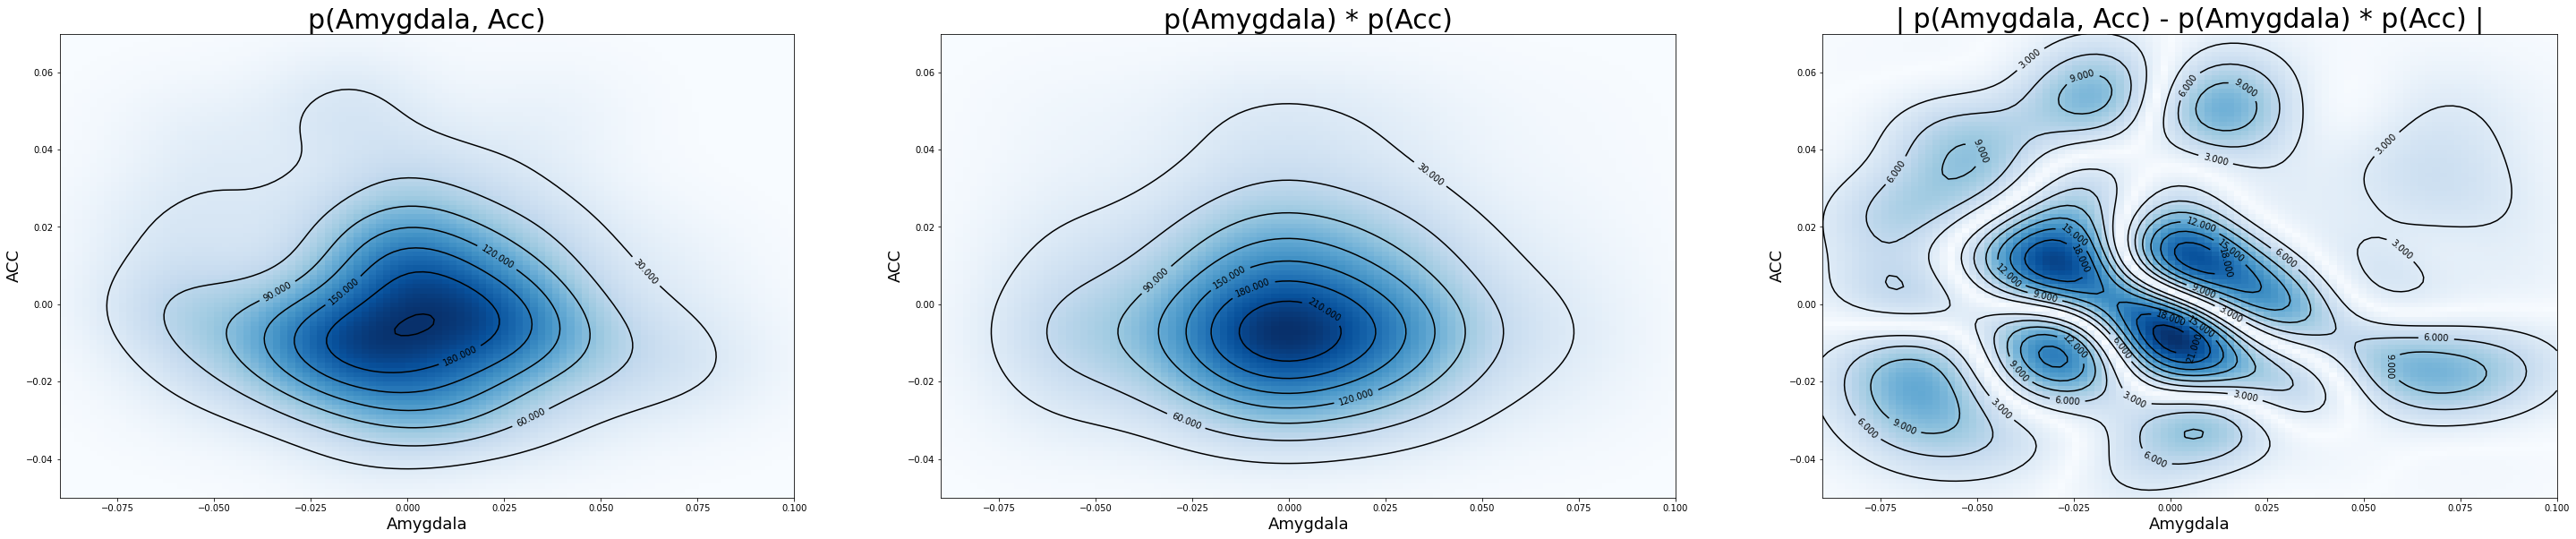

In [8]:
plt.subplots(nrows=1, ncols=3, figsize=(50,10))
ax = plt.subplot(131)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('Amygdala',fontsize=18)
ax.set_ylabel('ACC',fontsize=18)
ax.set_title('p(Amygdala, Acc)', fontsize=30)

ax1 = plt.subplot(132)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
ax1.imshow(np.rot90(marginals), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

cset = ax1.contour(xx, yy, marginals, colors='k')
ax1.clabel(cset, inline=1, fontsize=10)
ax1.set_xlabel('Amygdala',fontsize=18)
ax1.set_ylabel('ACC',fontsize=18)
ax1.set_title('p(Amygdala) * p(Acc)', fontsize=30)


ax2 = plt.subplot(133)
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
ax2.imshow(np.rot90(np.abs(f-marginals)), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

cset = ax2.contour(xx, yy, np.abs(f-marginals), colors='k')
ax2.clabel(cset, inline=1, fontsize=10)
ax2.set_xlabel('Amygdala',fontsize=18)
ax2.set_ylabel('ACC',fontsize=18)
ax2.set_title('| p(Amygdala, Acc) - p(Amygdala) * p(Acc) |', fontsize=30)
plt.savefig('3graph1.png', bbox_layout='tight', bbox_inches='tight')
plt.show()

#### 4  Now we will consider the variable orientation. We will estimate the conditional distribution of the volume of the amygdala, conditioning on political orientation: p(amygdala|orientation = c), c = 2, . . . , 5. Do the same for the volume of the acc: Plot p(acc|orientation = c), c = 2, . . . , 5. You will use KDE to achieve the goal. (Note that the conditional distribution can be understood as fitting a distribution for the data with the same (fixed) orientation. Thus there should be 4 one-dimensional distribution functions to show for this question.)

In [9]:
def conditional(orientation, region):
    df = data[data.orientation == orientation].loc[:, region]
    return df

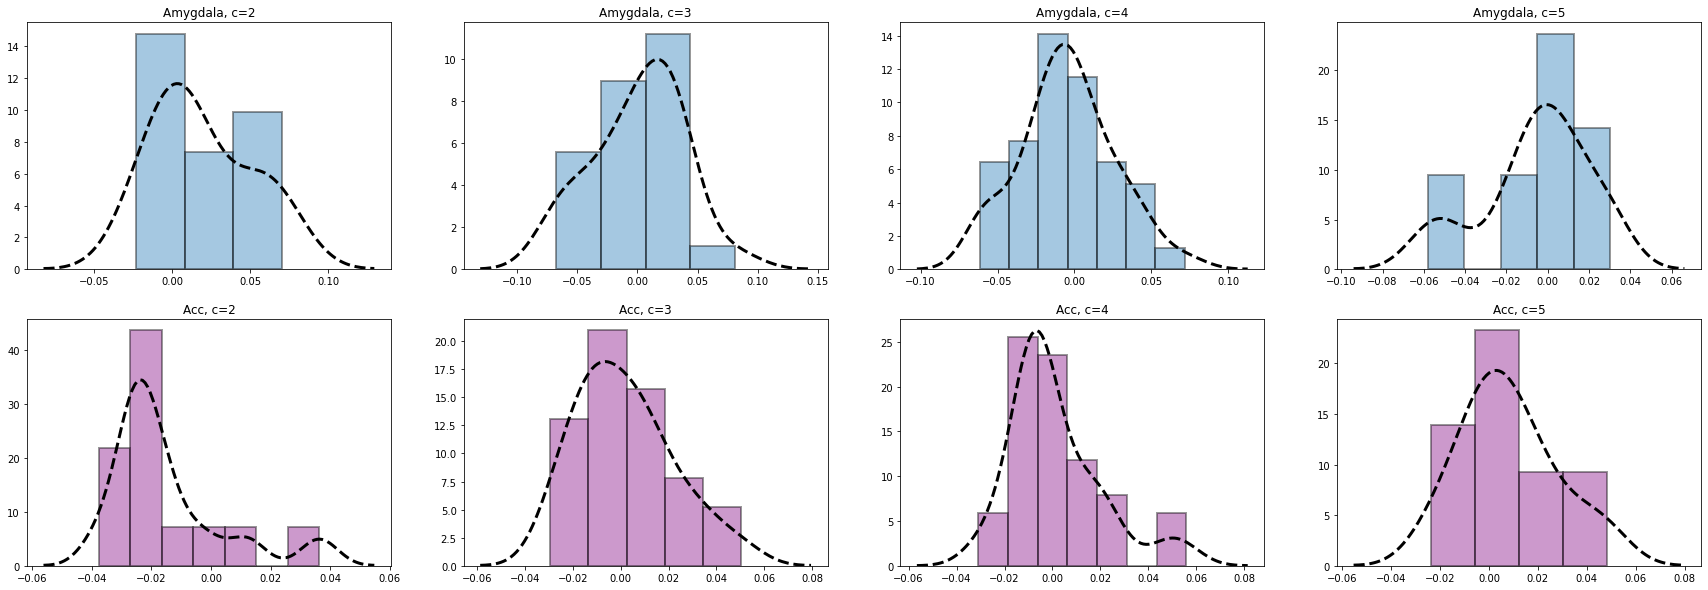

In [10]:
plt.subplots(nrows=2, ncols=4, figsize=(30,10))
for i in range(2,6):
    plt.subplot(2,4,i-1)
    sns.distplot(conditional(i, 'amygdala'),kde_kws=dict(color='k', ls='--', lw=3),hist_kws=dict(edgecolor="k", linewidth=2))
    plt.title('Amygdala, c={}'.format(i))
    plt.xlabel('')

for i in range(2,6):
    plt.subplot(2,4,i+3)
    sns.distplot(conditional(i, 'acc'),kde_kws=dict(color='k', ls='--', lw=3), hist_kws=dict(edgecolor="k", linewidth=2), color='purple')
    plt.title('Acc, c={}'.format(i))
    plt.xlabel('')

plt.savefig('4kde.png', bbox_layout='tight', bbox_inches='tight')
plt.show()

#### 5. Again we will consider the variable orientation. We will estimate the conditional joint distribution of the volume of the amygdala and acc, conditioning on a function of political orientation: p(amygdala, acc|orientation = c), c = 2, . . . , 5. You will use two-dimensional KDE to achieve the goal.

In [11]:
def joint(orientation):
    df = data[data.orientation == orientation].loc[:, ['amygdala', 'acc']]

    x = df.loc[:, 'amygdala'].values
    y = df.loc[:, 'acc'].values
    xmin, xmax = np.min(x)*1.8, np.max(x)*1.8
    ymin, ymax = np.min(y)*1.8, np.max(y)*1.8


    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = sm.nonparametric.KDEMultivariate(data=values,var_type='cc', bw='normal_reference')
    f = np.reshape(kernel.pdf(positions).T, xx.shape)
    
    return f, kernel, xx, yy, xmin, xmax, ymin, ymax, positions



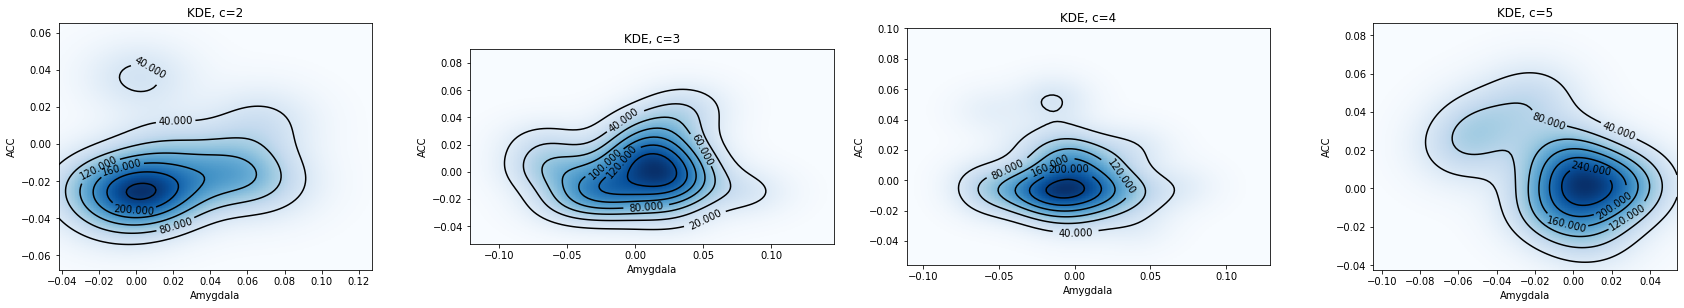

In [12]:
plt.subplots(nrows=1, ncols=4, figsize=(30,10))

for i in range(2,6):
    
    f, _, xx, yy, xmin, xmax, ymin, ymax, _ = joint(i)
    
    ax = plt.subplot(2,4,i-1)

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)


    ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

    cset = ax.contour(xx, yy, f, colors='k')

    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel('Amygdala')
    ax.set_ylabel('ACC')
    ax.set_title('KDE, c={}'.format(i))
plt.savefig('4kde_conditional.png', bbox_layout='tight', bbox_inches='tight')
plt.show()

#### Using (d) and (e), evaluate whether or not the two variables are likely to be conditionally independent. To verify this, please show three plots: the map for p(amygdala, acc|orientation = c), the map for p(amygdala|orientation = c)p(acc|orientation = c) and the error map |p(amygdala, acc|orientation = c) − p(amygdala|orientation = c)p(acc|orientation = c)|, c = 2, . . . , 5. Comment on your results and whether this helps us to find out whether the two parts of brains (for emotions and decision-making) functions independently or they are related, conditionally on the political orientation (i.e., considering different types of personality).

In [13]:
amy_kde = sm.nonparametric.KDEUnivariate(data.amygdala.values)
amy_kde.fit(kernel='gau', bw=0.01623535)
acc_kde = sm.nonparametric.KDEUnivariate(data.acc.values)
acc_kde.fit(kernel='gau', bw=0.01017549)

In [14]:
def marginals(orientation, amy_bw, acc_bw):
    df = data[data.orientation == orientation]
    
    amy_kde = sm.nonparametric.KDEUnivariate(df.amygdala.values)
    acc_kde = sm.nonparametric.KDEUnivariate(df.acc.values)
    
    amy_kde.fit(kernel='gau', bw=amy_bw)
    acc_kde.fit(kernel='gau', bw=acc_bw)
    
    return amy_kde, acc_kde
    

def pick_orientation(orientation):
    f, kernel, xx, yy, xmin, xmax, ymin, ymax, positions = joint(orientation)
    
    amy_bw = kernel.bw[0]
    acc_bw = kernel.bw[1]
    
    amy_kde, acc_kde = marginals(orientation, amy_bw, acc_bw)
    
    margs = np.reshape([amy_kde.evaluate(x[0]) * acc_kde.evaluate(x[1]) for x in positions.T], xx.shape) 
    
    return f, margs, xx, yy, xmin, xmax, ymin, ymax

In [15]:
f, margs, xx, yy, xmin, xmax, ymin, ymax = pick_orientation(2)

In [16]:
def plot_three(f, margs, xx, yy, xmin, xmax, ymin, ymax, savefig):
    plt.subplots(nrows=1, ncols=3, figsize=(50,10))
    ax = plt.subplot(131)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel('Amygdala',fontsize=18)
    ax.set_ylabel('ACC',fontsize=18)
    ax.set_title('p(Amygdala, Acc)', fontsize=30)

    ax1 = plt.subplot(132)
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    ax1.imshow(np.rot90(margs), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

    cset = ax1.contour(xx, yy, margs, colors='k')
    ax1.clabel(cset, inline=1, fontsize=10)
    ax1.set_xlabel('Amygdala',fontsize=18)
    ax1.set_ylabel('ACC',fontsize=18)
    ax1.set_title('p(Amygdala) * p(Acc)', fontsize=30)


    ax2 = plt.subplot(133)
    ax2.set_xlim(xmin, xmax)
    ax2.set_ylim(ymin, ymax)
    ax2.imshow(np.rot90(np.abs(f-margs)), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

    cset = ax2.contour(xx, yy, np.abs(f-margs), colors='k')
    ax2.clabel(cset, inline=1, fontsize=10)
    ax2.set_xlabel('Amygdala',fontsize=18)
    ax2.set_ylabel('ACC',fontsize=18)
    ax2.set_title('| p(Amygdala, Acc) - p(Amygdala) * p(Acc) |', fontsize=30)
    plt.savefig(savefig, bbox_layout='tight', bbox_inches='tight')
    plt.show()

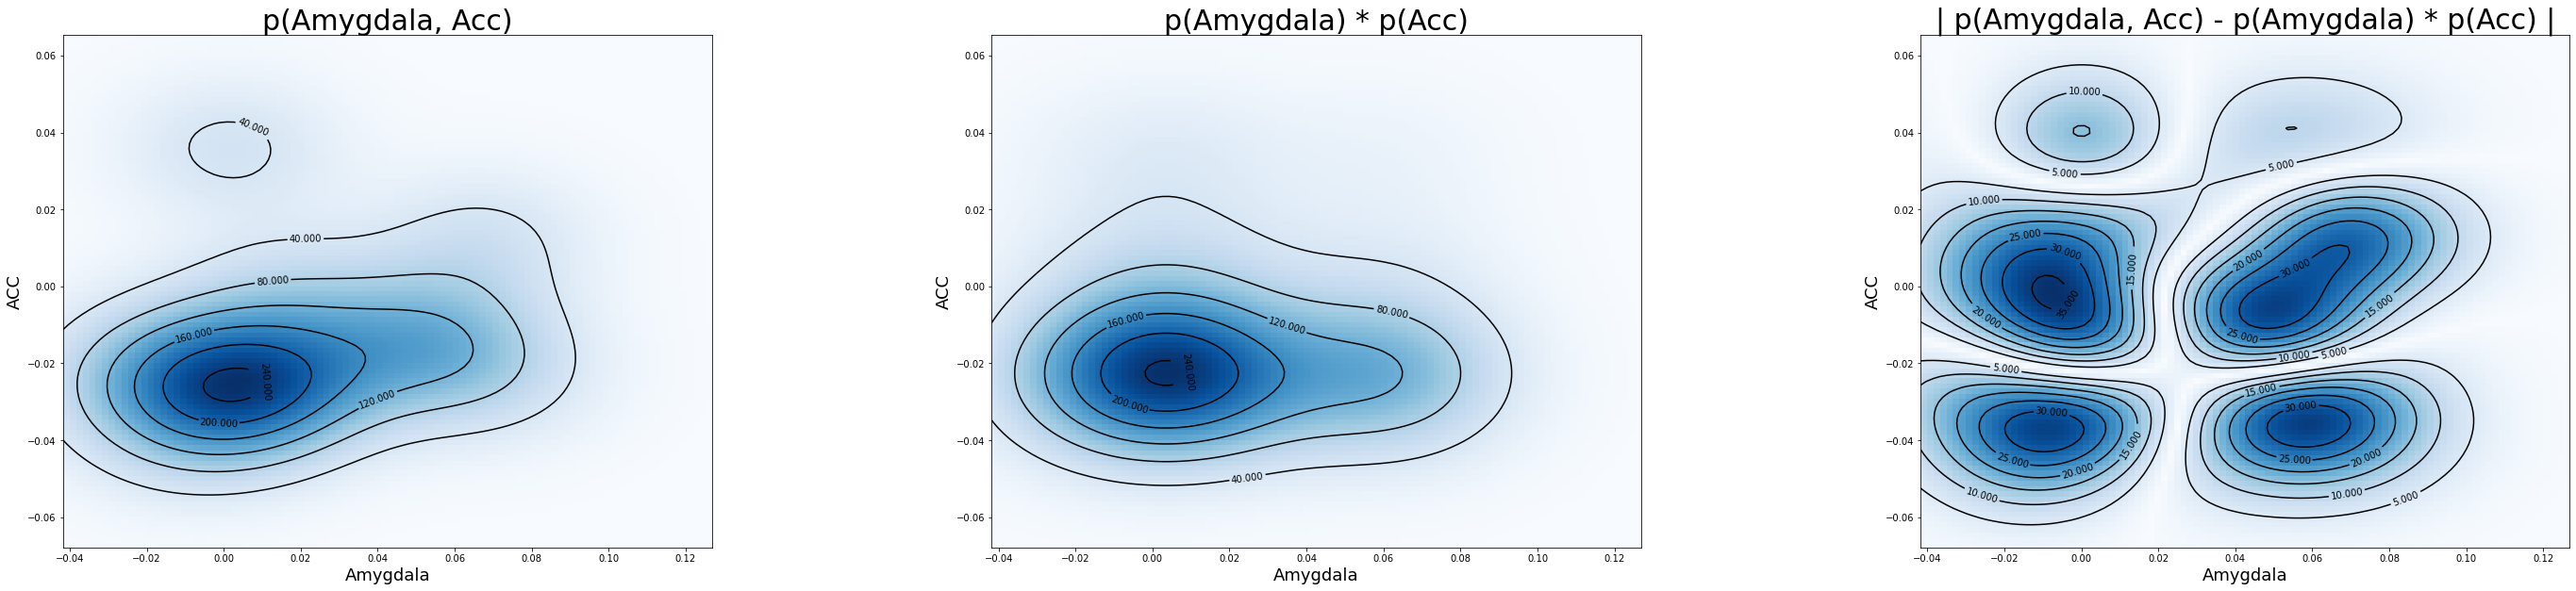

In [17]:
f, margs, xx, yy, xmin, xmax, ymin, ymax = pick_orientation(2)
plot_three(f, margs, xx, yy, xmin, xmax, ymin, ymax, 'condition2.png')

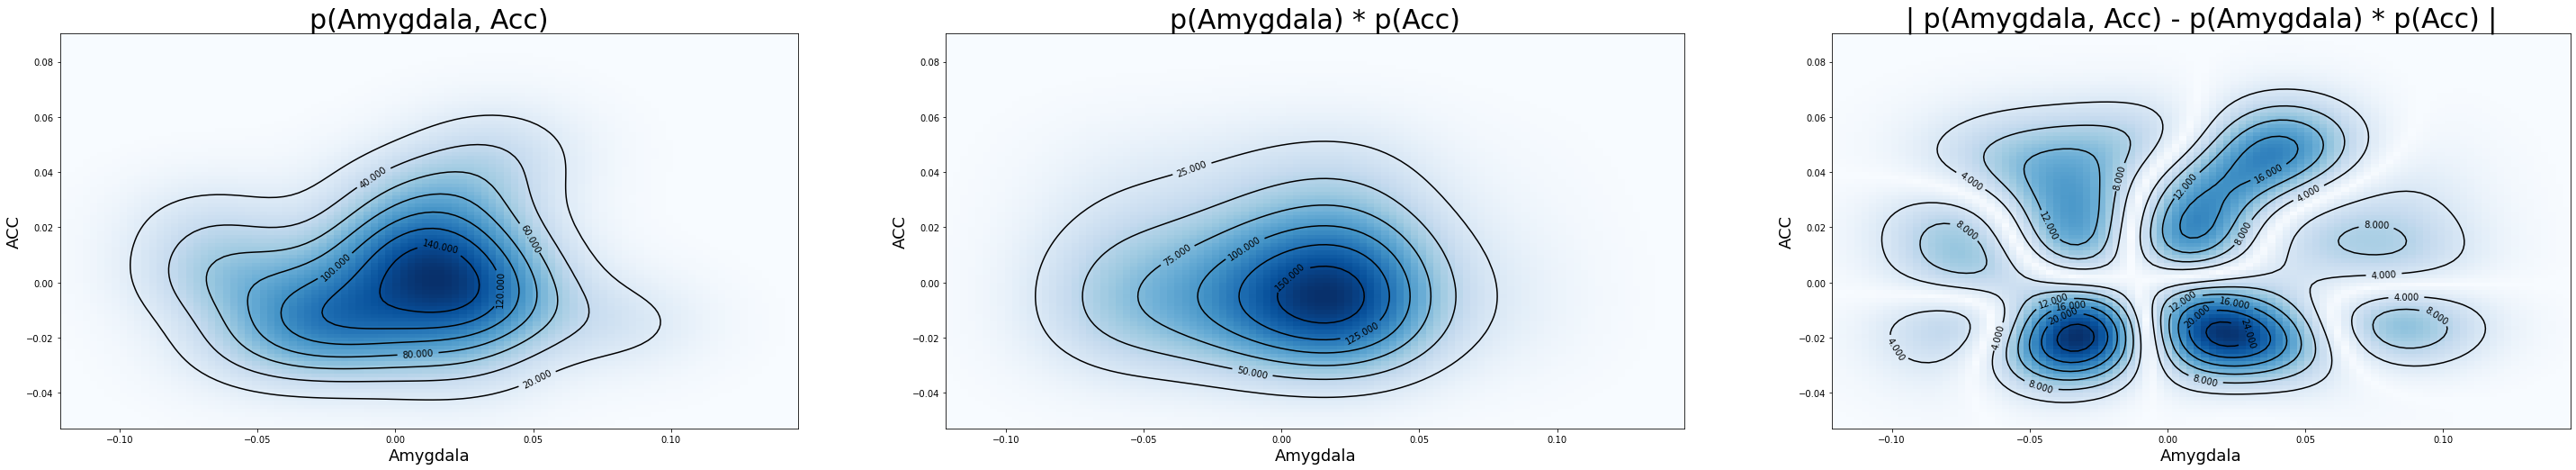

In [18]:
f, margs, xx, yy, xmin, xmax, ymin, ymax = pick_orientation(3)
plot_three(f, margs, xx, yy, xmin, xmax, ymin, ymax, 'condition3.png')

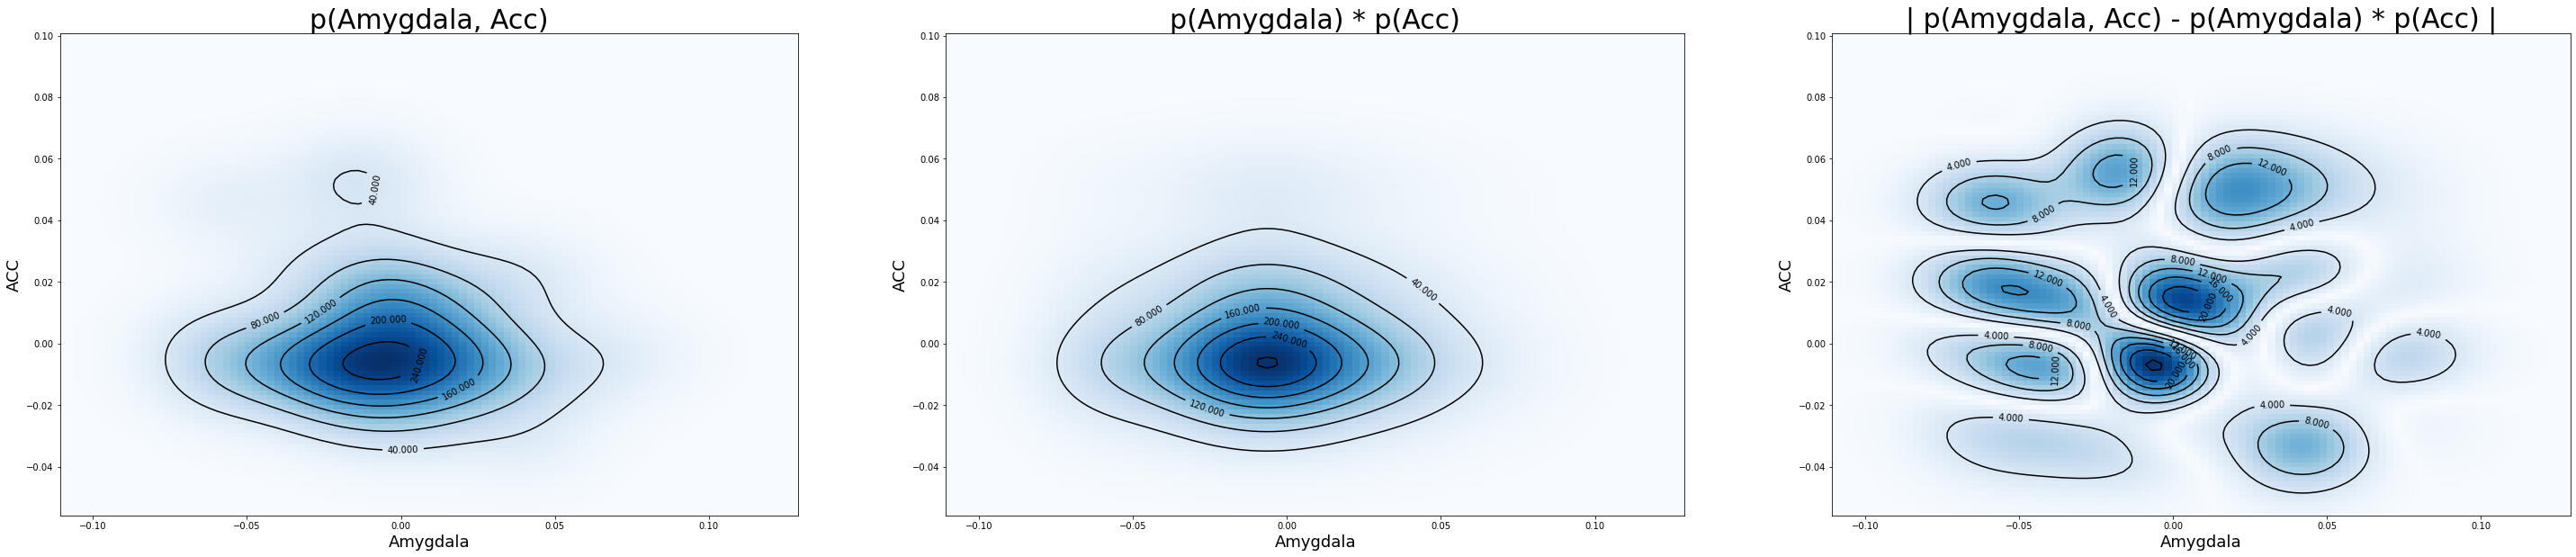

In [19]:
f, margs, xx, yy, xmin, xmax, ymin, ymax = pick_orientation(4)
plot_three(f, margs, xx, yy, xmin, xmax, ymin, ymax, 'condition4.png')

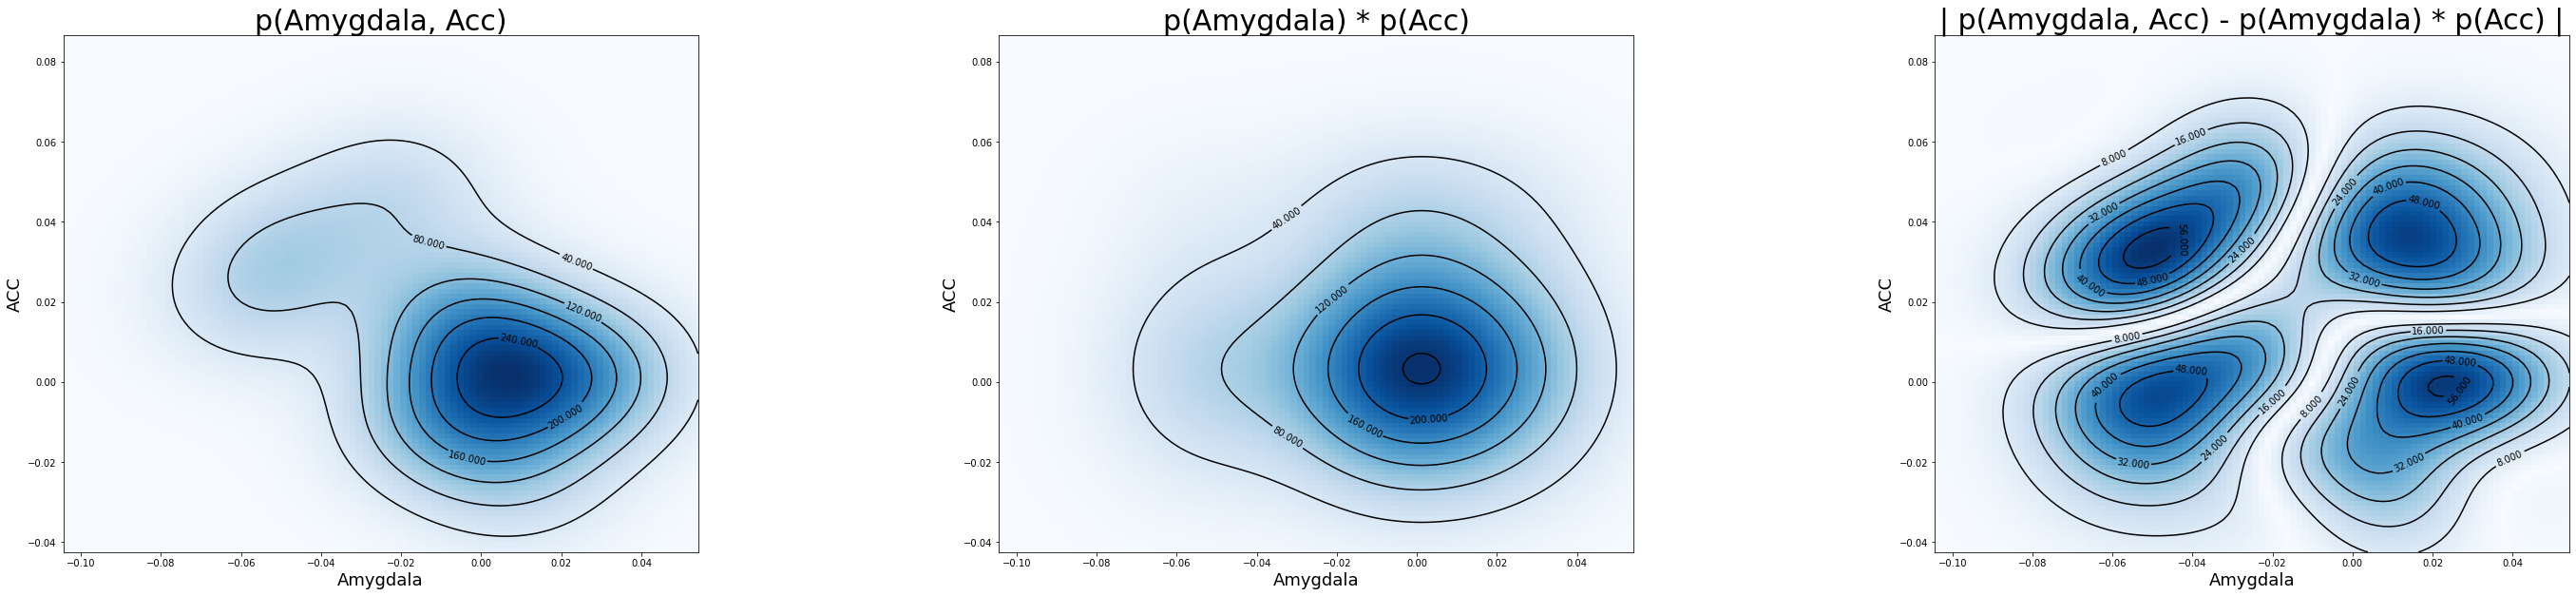

In [20]:
f, margs, xx, yy, xmin, xmax, ymin, ymax = pick_orientation(5)
plot_three(f, margs, xx, yy, xmin, xmax, ymin, ymax, 'condition5.png')